<h1><center>Lab 11:<br>Angular Momentum</center></h1>

<h2>Introduction</h2>
In this lab we will study the conservation of angular momentum in the absence of an external torque and the change in angular momentum when an external torque is present. In general the rate of change of the angular momentum of a system is $\frac{dL}{dt} = T_{external}$. If there are no external torques present then $\frac{dL}{dt}$ is zero and thus L = constant. Recall that for a rigid body rotation about a single axis $L = i \omega$ where I is the moment of intertia of the body and $\omega$ its angular velocity. If I is constant then
<br>
<center> $I \frac{d \omega}{dt} = T_{external} $ </center>
<br>
and thus
<br>
<center> $ \frac{d \omega}{dt} = \frac{T_{external}}{I}$ </center>
<br>
We will use our rotating chair to measure these quantities.
<br>
<h2>Design of the chair</h2>
The chair has a low friction bearing in it which is designed to minimize the frictional torque that is exterted by the bearing. Another possible source of frictional torque is air resistance. If air resistance is significant then $\frac{d \omega}{dt}$ should be velocity-dependent since drag forces such as air resistance are velocity-dependent. On the other hand, if the dominant torque is due to bearing friction then $\frac{d \omega}{dt}$ should be constant. We will measure \frac{d \omega}{dt} and see if air resistance is important in our experiment.
<br>
The chair has an optical counter which sits on the axis of rotation. The optical counter consists of a laser, a clock, a photo-detector and a slotted disk which interrupts the light. This allows the electronics to measure the rotation reate to a precision of one degree per second. The disk has 200 holes drilled in it on an 8-inch diameter so the spacing between holes is $\frac{2 \pi}{200} = 0.0314159$ radians apart. This information is needed to calibrate the sensor.
<br>
The chair has two movable weights attached to a bar. You can move the weights radially in or out. This allows you to change the moments of interia of the system. The chair also has a seat belt to help keep you from moving around as you spin.
<h2>Procedure</h2>
You will need to take three sets of data.
<br>
1) Take the first set with the chair arms in. Sit in the chair (be sure to use the seat belt) and get your lab partner to spin you. Your initial rotation rate should be between 100 degrees/s and 125 degrees/s. Your partner can see the rotation rate of the chair by looking at the LED display on the chair. The chair may wobble at rotation rates above 125 degrees/s. Your lab partner should start taking data and should continue to take data until your final rotation rate is 1/10 of your initial rotation rate.
<br>
2) Take a second set of data in exactly the same way as the first except with the chair arms out.
<br>
3) For the third data set start with the chair arms out. Spin smoothly for a few seconds (10 or so) and then quickly (but smoothly) bring the chair arms in. Spin with the chair arms in for about 15-20 seconds and then quickly (but smoothly) move the arms out. Spin for about 15-20 seconds. Repeat this procedure until your spin rate falls below 20 degrees/s (your partner will tell you when this happens).
<br>
<br>
In order to get good data it is important that your body position stay the same for all three test runs (with the exception of you arms which will move in and out with the weights). It is also critical that you keep your body "quiet" during the run. If you move in the chair you can significantly change the moment of intertia and possibly cause the chair to wobble.
<br>
<br>
As we have done previously, we will take the data using DataStudio. You will need to collect angular velocity data as a function of time. The software and sensor will be set up and configured before you begin. Be sure to export the correct data for each of the three trials in a text format so we can import it into Jupyter, we will need to rescale our data by 1/100 to retrieve the data in physical units of radians/s. Unfortunately, the sensor will report the measurements as a linear velocity in m/s, but it is in fact in units of Hectoradians/s.

<h2>Analyzing the Data</h2>
The next step is to read your data. You will only need the time-angular velocity in pairs. Remember that DataStudio usually includes a text header that must be removed one the data has been collected. This can be done manually in the data file or it can be done with list slicing.
<br>
You should have three sets of data. The data I took is shown below. The first data set was taken with the weights in the in position.

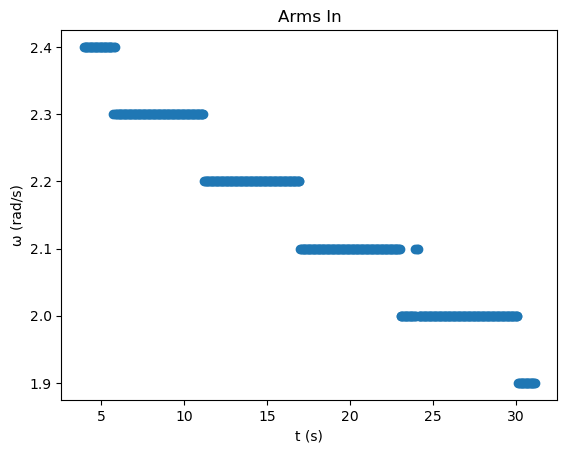

In [16]:
import csv
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

with open('chair_arms_in.csv', 'r') as file:
    reader = csv.reader(file)
    time = []
    velocity = []
    for row in reader:
        
        #Take only the Y position data
        time.append(row[0])
        
        #Take only the Time data
        velocity.append(row[1])
time = [float(i) for i in time[80:]]
velocity = [-float(i) for i in velocity[80:]]

plt.plot(time, velocity, 'o')
plt.title('Arms In')
plt.ylabel('ω (rad/s)')
plt.xlabel('t (s)')
plt.show()

The second data set was taken with the chair weights out.

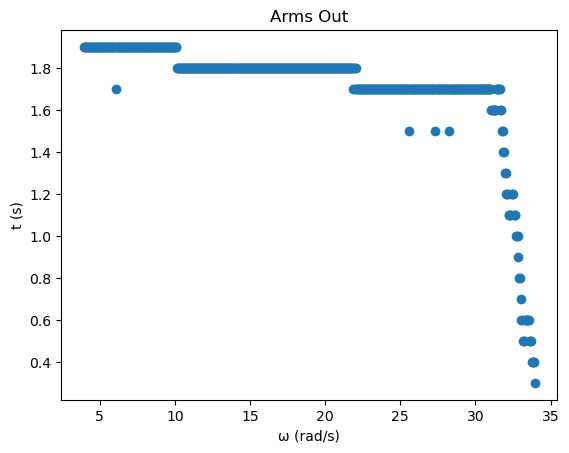

In [10]:
with open('chair_arms_out.csv', 'r') as file_out:
    read_out = csv.reader(file_out)
    time_out = []
    velocity_out = []
    for row in read_out:
        
        #Take only the Y position data
        time_out.append(row[0])
        
        #Take only the Time data
        velocity_out.append(row[1])
time_out = [float(i) for i in time_out[80:]]
velocity_out = [-float(i) for i in velocity_out[80:]]

plt.plot(time_out, velocity_out, 'o')
plt.title('Arms Out')
plt.xlabel('ω (rad/s)')
plt.ylabel('t (s)')
plt.show()

The last data set is taken with the chair weights being moved from the out position to the in position.

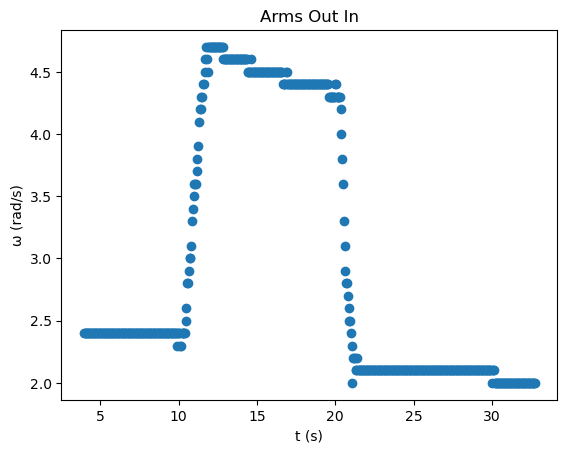

In [13]:
with open('chair_arms_out_in_out.csv', 'r') as file_out_in:
    read_out_in = csv.reader(file_out_in)
    time_out_in = []
    velocity_out_in = []
    for row in read_out_in:
        
        #Take only the Y position data
        time_out_in.append(row[0])
        
        #Take only the Time data
        velocity_out_in.append(row[1])
time_out_in = [float(i) for i in time_out_in[80:]]
velocity_out_in = [-float(i) for i in velocity_out_in[80:]]

plt.plot(time_out_in, velocity_out_in, 'o')
plt.title('Arms Out In')
plt.ylabel('ω (rad/s)')
plt.xlabel('t (s)')
plt.show()

If the only torque on the chair comes from the bearing friction then:
<br> $\frac{d \omega}{dt} = \frac{T_{external}}{I}$ and $\frac{d \omega}{dt}$ should be a straight line if you do not move the weights. You can use <b>polyfit</b> to find a straight line for your data. <br>
The slope of this line should be $\frac{T_{external}}{I}$. We will need to calculate this rate for the system both before and after the change in momentum of inertia. This is shown below, first for the time before the "collision".

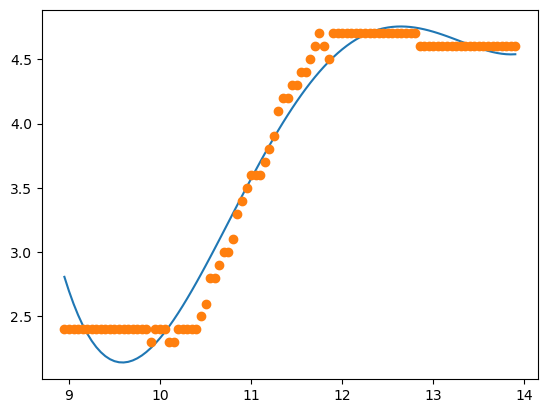

In [43]:
EarlyDataT = time_out_in[100:200]
EarlyDataV = velocity_out_in[100:200]
EarlyFit = np.polyfit(EarlyDataT, EarlyDataV, deg=4)
EarlyFitVals = np.polyval(EarlyFit, EarlyDataT)
plt.plot(EarlyDataT, EarlyFitVals)
plt.plot(EarlyDataT, EarlyDataV, 'o')
plt.show()

The slope of this line should be $\frac{\tau_{external}}{I_1}$ where $I_1$ is the moment of inertia of the chair-person system with the weights out.

Next, fit a line with the chair weights in. The slope of this line should be $\frac{\tau_{external}}{I_2}$ where $I_2$ is the moment of inertia of the chair-person system with the chair arms in.

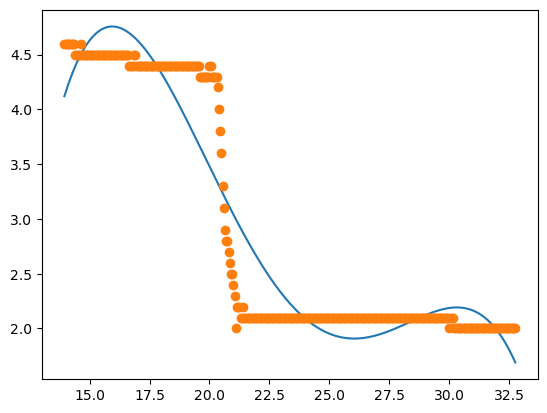

In [44]:
LateDataT = time_out_in[200:]
LateDataV = velocity_out_in[200:]
LateFit = np.polyfit(LateDataT, LateDataV, deg=4)
LateFitVals = np.polyval(LateFit, LateDataT)
plt.plot(LateDataT, LateFitVals)
plt.plot(LateDataT, LateDataV, 'o')
plt.show()

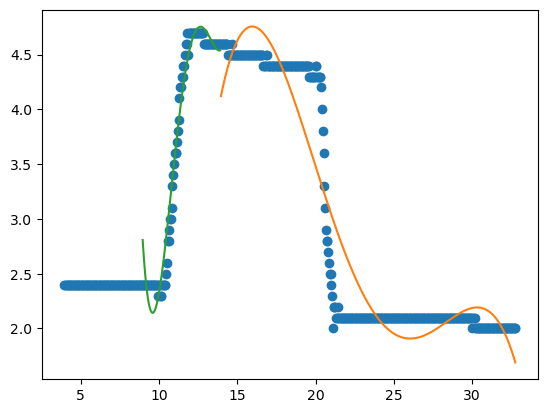

In [48]:
plt.plot(time_out_in,velocity_out_in,'o')
plt.plot(LateDataT,LateFitVals)
plt.plot(EarlyDataT, EarlyFitVals)
plt.show()

If we now divide these two slopes we should get $\frac{I_2}{I_1}$. Now, $\frac{d \omega_1}{dt} = \frac{\tau_{external}}{I_1}$ and $\frac{d \omega_2}{dt} = \frac{\tau_{external}}{I_2}$ are both approximately constant, so $\omega_1 (t) = \omega_{01} + \frac{\tau_{external}}{I_2} t$ and $\omega_{02} + \frac{\tau_{external}}{I_2} t$.
<br>
Over a short time interval the angular momentum of the system should be approximately conserved since the spin of the system does not change much over a second or so. If you bring the chair arms quickly (as in the third data run) the angular momentum of the system should be approximately conserved during that time. Thus $L_1=L_2 \rightarrow I_i \quad \omega_1 = I_2 \omega_2$ and so $\frac{\omega_1}{\omega_2} = \frac{I_2}{I_1}$ which is what we got from dividing slopes of the runs with the arms in and the arms out. You can now measure $\frac{\omega_1}{\omega_2}$ from the data in which you moved the arms in and out and see the equality holds.

<h2>Upshot</h2>
This is a rough outline of the experiment. <i>This is not necessarily a complete list of what needs to be done.</i>
1) You need to take data for three cases:<br>
a) Spinning with arms down;<br>
b) Spinning with arms up (horizontal);<br>
c) Initially spinning with arms down, then raise arms quickly (but smoothly).<br>
Import each data set and make sure the units are right.
<br>
2) For the first two data sets, check whether angular momentum is conserved. If it is not, is $\omega$ decreasing at a constant rate? You want to make some claim about whether the source of external torque $\tau_{external}$ is likely due to friction in the bearing or due to air resistance.
<br>
3) For the last data set, test again for angular momentum conservation, but this time by comparing the slope of $\omega$ before and after the arms are raised. The raising of ones arms in rotation motion is analogous to a collision in liner motion. Is angular momentum conserved in this "collision"? Is rotation kinetic energy conserved in this "collision"? Give the answer to each of these by computing the relevant quantities.
<br>
4) Make a comparison of your result to the results of Lab 10, where you modeled a person spinning in a chair. Do the results agree? Why or why not?

<h2>Assignment</h2>
The assignment for Week 11 is a <u>full Lab Report</u> which addresses all relevant questions from this writeup, and reflects on each. This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.